# UC scDRS and scGWAS Comparison

## 0. Get the colors and set up ready

In [1]:
library(data.table)
library(readxl)
library(Matrix)
library(stringr)
library(tidyverse)
library(cowplot)
library(ggnewscale)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ forcats 1.0.0
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ tidyr::expand()    masks Matrix::expand()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ tidyr::pack()      masks Matrix::pack()
✖ purrr::transpose() masks data.table::transpose()
✖ tidyr::unpack()    masks Matrix::unpack()


In [2]:
meta_colors_epi <- c("Immature Goblet"="#7D86Ba", "Goblet"="#BC79AC", 
                 "TA 1"="#4A69A5",  "TA 2"="#629F3F", 
                 "Cycling TA"="#6A2A81",  "Secretory TA"="#CA7953",
                 "Immature Enterocytes 1"="#C46A1F", "Immature Enterocytes 2"="#D2D05D", 
                 "Enteroendocrine"="#272727", "Enterocyte Progenitors"="#7f4521", 
                 "Best4+ Enterocytes"="#79B193", "Enterocytes"="#A7C6E6", 
                 "Stem"="#B01C20","Tuft"="#9DBF4A", 
                 "M cells"="#878787")
meta_colors_fib <- c('WNT2B+ Fos-lo 1'='#4b67a3', 'WNT2B+ Fos-lo 2'='#66a141', 
                   'WNT2B+ Fos-hi'='#ae1e24', 
                   'WNT5B+ 1'='#c7661c', 'WNT5B+ 2'='#d2d35b', 
                   'Myofibroblasts'='#a5c3e2', 'RSPO3+'='#6f3b85', 
                   'Inflammatory Fibroblasts'='#7d492a')
meta_colors_b <- c("Plasma" = "#A6CEE3", "Cycling B" = "#B2DF8A", 
                   "Follicular" = "#FF7F00", "GC" = "#1F78B4")

meta_colors_t <- c("MT-hi" = "#A6CEE3", "Cycling T" = "#1F78B4", 
                 "NKs" = "#B2DF8A", "ILCs" = "#33A02C", 
                 "CD8+ IELs" = "#FB9A99", "CD8+ LP" = "#E31A1C", 
                 "CD8+ IL17+" = "#FDBF6F", 
                 "CD4+ Activated Fos-hi" = "#CAB2D6", "CD4+ Activated Fos-lo" = "#6A3D9A", 
                 "CD4+ Memory" = "#FFFF99", "CD4+ PD1+" = "#B15928", 
                 "Tregs" = "#B3E2CD")

meta_colors_my <- c("Macrophages" = "#A6CEE3", "DC1" = "#1F78B4", 
                 "DC2" = "#B2DF8A", "CD69+ Mast" = "#33A02C", 
                 "CD69- Mast" = "#FB9A99", "Cycling Monocytes" = "#E31A1C", 
                 "Inflammatory Monocytes" = "#FDBF6F")

meta_colors_end <- c("Endothelial" = "#868686", 
                     "Microvascular" = "#78b392",
                     "Post-capillary Venules" = "#c97b51", 
                     "Pericytes" = "#7f87bc")
meta_colors_glia <- c("Glia"="#ba79a9")
meta_colors <- c(meta_colors_epi, meta_colors_fib, meta_colors_end, meta_colors_glia, 
                 meta_colors_b, meta_colors_t, meta_colors_my)


In [3]:
meta_colors_macro <- list("T_cell"="", 
                    "Myeloid"="", 
                    "Fibroblast"="", 
                    "Endothelial"="", 
                    "B_cell"="", 
                    "Epithelial"="", 
                    "Glia"="")


In [4]:
meta_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)

In [5]:
exp_epi <- c("Immature Goblet"="white", "Goblet"="#fd8d3c", 
                 "TA 1"="#fdbe85",  "TA 2"="#fdbe85", 
                 "Cycling TA"="#fdbe85",  "Secretory TA"="#fdbe85",
                 "Immature Enterocytes 1"="white", "Immature Enterocytes 2"="white", 
                 "Enteroendocrine"="white", "Enterocyte Progenitors"="white", 
                 "Best4+ Enterocytes"="#fd8d3c", "Enterocytes"="white", 
                 "Stem"="#fdbe85","Tuft"="#fd8d3c", 
                 "M cells"="#fd8d3c")
exp_fib <- c('WNT2B+ Fos-lo 1'='#fdbe85', 'WNT2B+ Fos-lo 2'='#fdbe85', 
                   'WNT2B+ Fos-hi'='#fdbe85', 
                   'WNT5B+ 1'='white', 'WNT5B+ 2'='white', 
                   'Myofibroblasts'='white', 'RSPO3+'='white', 
                   'Inflammatory Fibroblasts'='#fd8d3c')
exp_b <- c("Plasma" = "#fd8d3c", "Cycling B" = "white", 
                   "Follicular" = "white", "GC" = "white")

exp_t <- c("MT-hi" = "white", "Cycling T" = "white", 
                 "NKs" = "white", "ILCs" = "#fdbe85", 
                 "CD8+ IELs" = "white", "CD8+ LP" = "white", 
                 "CD8+ IL17+" = "#fd8d3c", 
                 "CD4+ Activated Fos-hi" = "white", "CD4+ Activated Fos-lo" = "white", 
                 "CD4+ Memory" = "white", "CD4+ PD1+" = "white", 
                 "Tregs" = "#fdbe85")

exp_my <- c("Macrophages" = "white", "DC1" = "white", 
                 "DC2" = "white", "CD69+ Mast" = "white", 
                 "CD69- Mast" = "white", "Cycling Monocytes" = "white", 
                 "Inflammatory Monocytes" = "#fd8d3c")

exp_end <- c("Endothelial" = "white", 
                     "Microvascular" = "white",
                     "Post-capillary Venules" = "white", 
                     "Pericytes" = "white")
exp_glia <- c("Glia"="white")
exp_colors <- c(exp_epi, exp_fib, exp_end, exp_glia, 
                 exp_b, exp_t, exp_my)

exp_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)

## 1. Get Meta Data Ready

In [6]:
# read in metadata
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/Simile_UC/"
meta_data <- readRDS(paste0(dir, "meta_qc_ulcerative_colitis_gut_celltypes_covariates_2023_06_08.rds"))
# read in results
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_53_dec/"
cell_score <- data.frame(fread(paste0(output_dir, "UC.score.gz")))

In [7]:
# add cell scores to meta data
rownames(cell_score) <- cell_score$V1
cell_score <- cell_score[meta_data$cell,]
identical(cell_score$V1, meta_data$cell)
meta_data <- cbind(meta_data, cell_score)
any(is.na(cell_score))

[1] TRUE

[1] FALSE

In [8]:
meta_data[1:2,]

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,Location,Smoking,V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,Epithelial,Female,Transverse_Colon,Never,N7.EpiA.AACAAACTTCTCCG,0.04865450,1.3519231,0.08891109,0.09212873,1.0356050,1.3277599
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,Epithelial,Female,Transverse_Colon,Never,N7.EpiA.AACTCGGACGTAAC,0.04487468,-0.1853526,0.56043960,0.55926510,0.2523823,-0.1491061


In [9]:
sig_count <- data.frame(table(meta_data[meta_data$mc_pval < 0.05,]$cluster))
# make a dictionary from sig count
sig_count_dict <- sig_count[,2]
names(sig_count_dict) <- sig_count[,1]
cat(sig_count_dict)

69 369 270 638 17 13 51 34 389 51 24 31 1010 1 134 43 115 538 5 767 40 17 18 222 796 203 4 81 27 694 16 4 63 6 7623 112 378 130 138 1050 625 3 5 16 4 9 11

In [10]:
table(meta_data[meta_data$mc_pval < 0.05,]$macro)
meta_count <- data.frame(table(meta_data$cluster))
colnames(meta_count) <- c("Group", "Count")
sig_count <- data.frame(table(meta_data[meta_data$mc_pval < 0.05,]$cluster))
# make a dictionary from sig count
sig_count_dict <- sig_count[,2]
names(sig_count_dict) <- sig_count[,1]
meta_count[1:2,]
count_list <- c()
for (group_name in meta_count$Group) {
    if (group_name %in% names(sig_count_dict)) {
        count_list <- c(count_list, sig_count_dict[group_name])
        }
    else {count_list <- c(count_list, 0)}
    }

meta_count$Sig_Count <- count_list
meta_count$Sig_prop <- meta_count$Sig_Count/meta_count$Count
meta_count <- meta_count[order(-meta_count$Sig_prop),]
meta_count[1:3,]
rownames(meta_count) <- meta_count$Group


     B_cell Endothelial  Epithelial  Fibroblast     Myeloid      T_cell 
       8481         177        4701          53         947        2505 

,Group,Count
,<fct>,<int>
1,Best4+ Enterocytes,1609
2,CD4+ Activated Fos-hi,8498


,Group,Count,Sig_Count,Sig_prop
,<fct>,<int>,<dbl>,<dbl>
19,Enterocytes,1748,538,0.3077803
26,Immature Enterocytes 1,989,222,0.2244692
27,Immature Enterocytes 2,4067,796,0.1957217


In [11]:
# get visualization ready
epi_tsne2 <- data.frame(fread(paste0(dir, "Epi.tsne.txt")))
fib_tsne2 <- data.frame(fread(paste0(dir, "Fib.tsne.txt")))
imm_tsne2 <- data.frame(fread(paste0(dir, "Imm.tsne.txt")))
colnames(epi_tsne2) <- c("cell", "tsne1", "tsne2")
colnames(fib_tsne2) <- c("cell", "tsne1", "tsne2")
colnames(imm_tsne2) <- c("cell", "tsne1", "tsne2")

In [12]:
# check that there is no overlap in tsne cells
length(intersect(epi_tsne2$cell, fib_tsne2$cell))
length(intersect(epi_tsne2$cell, imm_tsne2$cell))
length(intersect(imm_tsne2$cell, fib_tsne2$cell))

[1] 0

[1] 0

[1] 0

In [13]:
any(is.na(meta_data))
meta_data$tsne_group <- rep(NA, nrow(meta_data))
# make sure every cell is accounted for in the tsne
meta_data[meta_data$cell %in% epi_tsne2$cell,]$tsne_group <- "EPI"
meta_data[meta_data$cell %in% fib_tsne2$cell,]$tsne_group <- "FIB"
meta_data[meta_data$cell %in% imm_tsne2$cell,]$tsne_group <- "IMM"
any(is.na(meta_data))
any(is.na(meta_data$tsne_group))

[1] TRUE

[1] TRUE

[1] FALSE

In [14]:
# add the TSNE data 
full_tsne <- rbind(epi_tsne2, fib_tsne2, imm_tsne2)
rownames(full_tsne) <- full_tsne$cell
full_tsne <- full_tsne[meta_data$cell,]
identical(meta_data$cell, full_tsne$cell)
meta_data <- cbind(meta_data, full_tsne[,c("tsne1", "tsne2")])

[1] TRUE

## 2. scDRS

In [16]:
macro_table <- fread(paste0(output_dir, "UC.scdrs_group.cell_type_macro"))
macro_table <- macro_table[order(-macro_table$assoc_mcz)]
# read in the macro & micro 5035kb
micro_table <- fread(paste0(output_dir, "UC.scdrs_group.cell_type_micro"))

meta_data$Z_score_macro <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro <- rep(NA, nrow(meta_data))


In [17]:
for (cell_group in macro_table$group) {
    # get the z score to put there
    meta_data[meta_data$macro == cell_group,]$Z_score_macro <- macro_table[macro_table$group == cell_group,]$assoc_mcz
    }

for (cell_group in micro_table$group) {
    # get the z score to put there
    meta_data[meta_data$cluster == cell_group,]$Z_score_micro <- micro_table[micro_table$group == cell_group,]$assoc_mcz
    }

In [18]:
data_summary <- function(x) {
   m <- mean(x)
   ymin <- m-sd(x)
   ymax <- m+sd(x)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

[1] "B_cell"     "Epithelial"

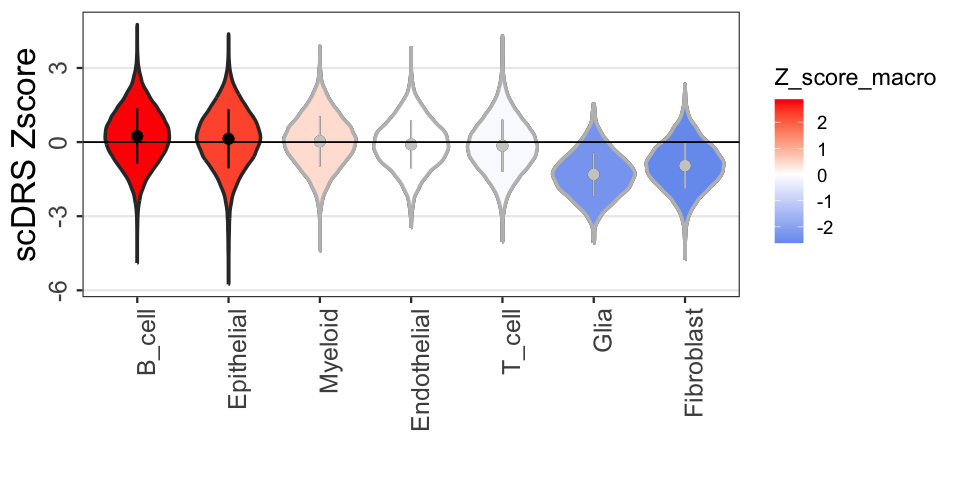

In [19]:
options(repr.plot.height = 4, repr.plot.width =8 )
sig_cell_types <- macro_table[macro_table$assoc_mcp < 0.1]$group
sig_cell_types
sig_cell_types_5 <- macro_table[macro_table$assoc_mcp < 0.05]$group
data3 = meta_data[!meta_data$macro %in% sig_cell_types,]
data2 = meta_data[!meta_data$macro %in% sig_cell_types_5,]

ggplot(meta_data, aes(x=factor(macro, levels=macro_table$group), y=zscore, fill=Z_score_macro)) +
geom_violin(data=meta_data, linewidth=1) +  
geom_violin(data=data2, color="grey60", linewidth=1, aes(fill=Z_score_macro)) + 
stat_summary(fun.data=data_summary) + stat_summary(data=data2, fun.data=data_summary, color="grey80") + 
geom_violin(data=data3, color="grey", linewidth=1, aes(fill=Z_score_macro)) + 
stat_summary(fun.data=data_summary) + stat_summary(data=data3, fun.data=data_summary, color="grey80") + 
geom_hline(yintercept=0, color="black") +
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15, hjust=1), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0)  + labs(y="scDRS Zscore",x='')
 #[meta_data$pval < 0.1,]
ggsave("./scDRS_macro_UC_Zscores.pdf", height=4, width=8)

In [20]:
# calculate the proportion significant
micro_table$prop_sig <- (micro_table$n_fdr_0.2/micro_table$n_cell)*100
macro_table$prop_sig <- (macro_table$n_fdr_0.2/macro_table$n_cell)*100

In [21]:
# ordering tables and getting rank
macro_table <- macro_table[order(-macro_table$prop_sig),]
macro_table$rank_prop_sig <- seq(1, nrow(macro_table))
macro_table <- macro_table[order(-(macro_table$assoc_mcz)),]
macro_table$rank_assoc_mcz <- seq(1, nrow(macro_table))
macro_table[1:2,]

micro_table <- micro_table[order(-micro_table$prop_sig),]
micro_table$rank_prop_sig <- seq(1, nrow(micro_table))
micro_table <- micro_table[order(-abs(micro_table$assoc_mcz)),]
micro_table$rank_assoc_mcz <- seq(1, nrow(micro_table))
micro_table[1:2,]

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,prop_sig,rank_prop_sig,rank_assoc_mcz
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
B_cell,81124,1000,0.007992008,2.870067,0.01098901,3.392916,0,0,0,0,1,1
Epithelial,48478,1000,0.021978023,2.299466,0.03596403,2.171241,0,0,0,0,2,2


group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,prop_sig,rank_prop_sig,rank_assoc_mcz
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
RSPO3+,347,1000,0.99900100,-2.72375,0.796203800,-0.8620024,0,0,0,0,40,1
Plasma,62992,1000,0.00999001,2.69578,0.006993007,3.8590572,0,0,0,0,38,2


In [23]:
sig_cell_clusters <- micro_table[micro_table$assoc_mcp < 0.05,]$group
length(sig_cell_clusters)
sig_cell_clusters

[1] 8

[1] "Plasma"                 "Tregs"                  "Enterocytes"           
[4] "TA 2"                   "Secretory TA"           "Immature Enterocytes 2"
[7] "M cells"                "Immature Enterocytes 1"

In [24]:
# list to add the ranked clusters within cell types for proper order
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- micro_table[micro_table$group %in% names(cell_type),]
    data <- data[order(assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "Tuft"                     "TA 1"                    
 [3] "Enteroendocrine"          "Best4+ Enterocytes"      
 [5] "Goblet"                   "Immature Goblet"         
 [7] "Enterocyte Progenitors"   "Cycling TA"              
 [9] "Stem"                     "Immature Enterocytes 1"  
[11] "M cells"                  "Immature Enterocytes 2"  
[13] "Secretory TA"             "TA 2"                    
[15] "Enterocytes"              "Glia"                    
[17] "Pericytes"                "Endothelial"             
[19] "Microvascular"            "Post-capillary Venules"  
[21] "RSPO3+"                   "WNT2B+ Fos-lo 2"         
[23] "WNT2B+ Fos-hi"            "WNT2B+ Fos-lo 1"         
[25] "WNT5B+ 2"                 "WNT5B+ 1"                
[27] "Inflammatory Fibroblasts" "Myofibroblasts"          
[29] "Cycling B"                "GC"                      
[31] "Follicular"               "Plasma"                  
[33] "CD69- Mast"               "CD69+ Mast"              
[35] "DC1"                      "Inflammatory Monocytes"  
[37] "DC2"                      "Macrophages"             
[39] "Cycling Monocytes"        "CD8+ IELs"               
[41] "MT-hi"                    "CD4+ Activated Fos-lo"   
[43] "CD4+ Memory"              "CD8+ LP"                 
[45] "CD4+ Activated Fos-hi"    "NKs"                     
[47] "CD4+ PD1+"                "ILCs"                    
[49] "Cycling T"                "CD8+ IL17+"              
[51] "Tregs"

#### Colored according to gradient

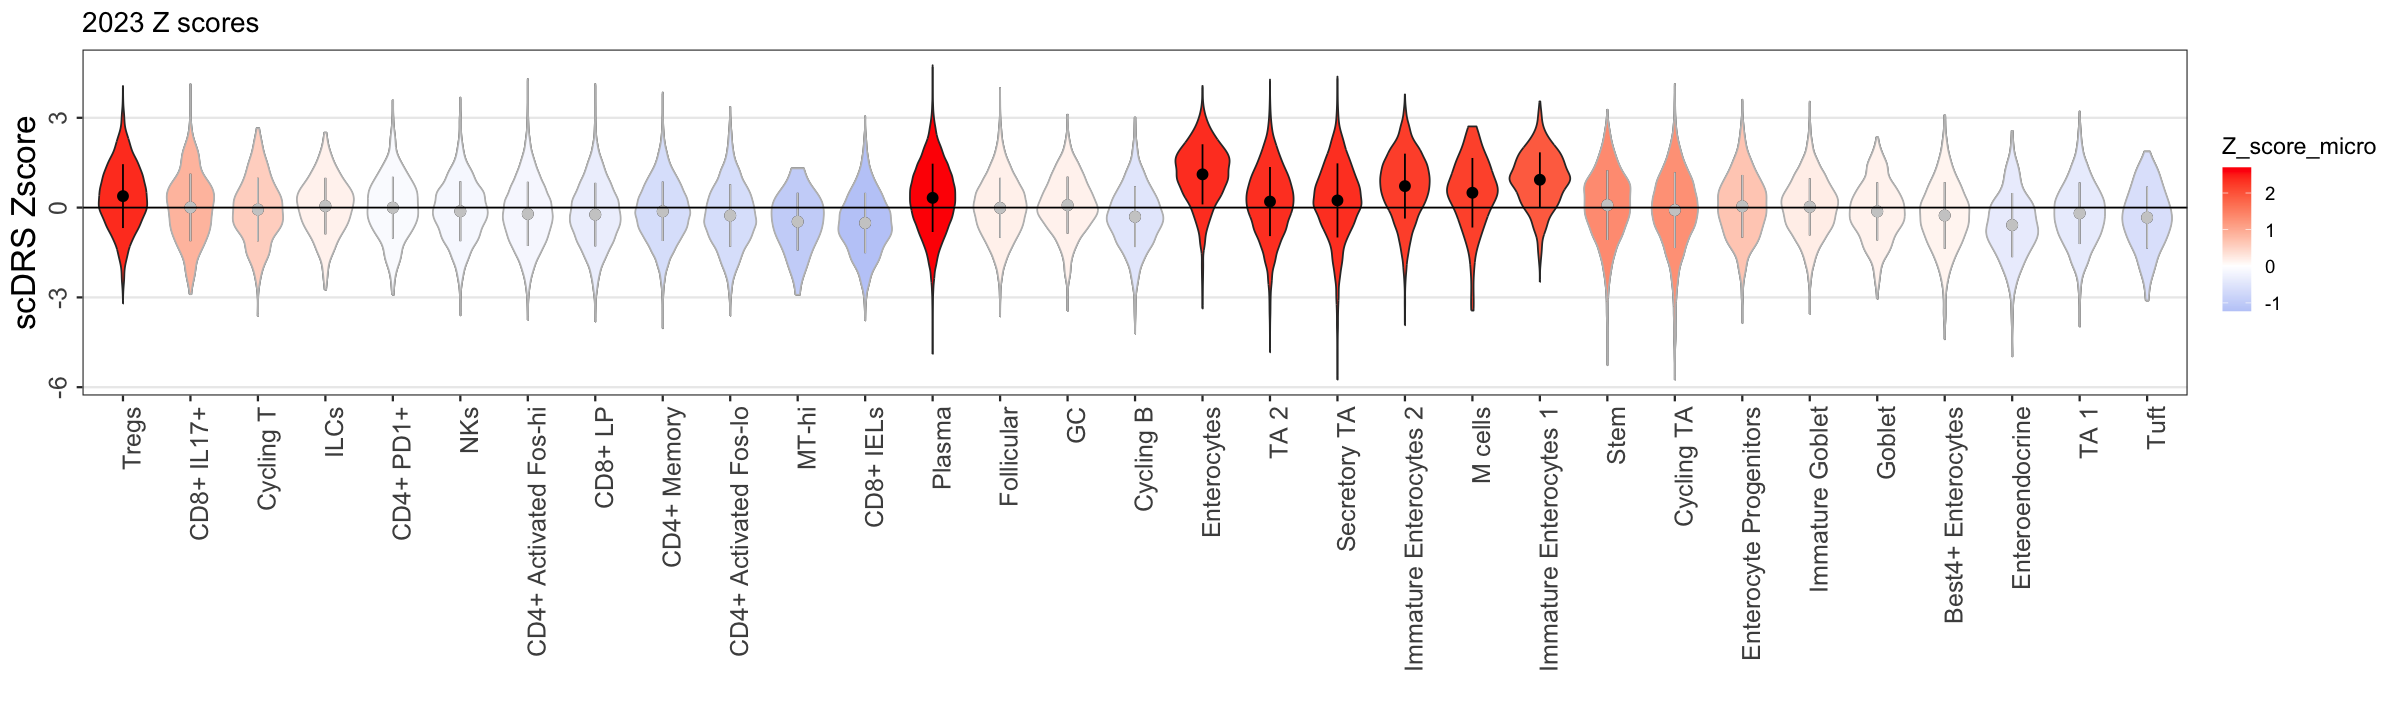

In [64]:
meta_data_tepi <- meta_data[meta_data$macro %in% c("T_cell", "Epithelial", "B_cell"),]
data2 = meta_data_tepi[!meta_data_tepi$cluster %in% sig_cell_clusters,]
options(repr.plot.height = 6, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(meta_data_tepi, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore, fill=Z_score_micro)) +
geom_violin(data=meta_data_tepi, linewidth=0.5) +  
geom_violin(data=data2, color="grey", linewidth=0.5, aes(fill=Z_score_micro)) + 
stat_summary(fun.data=data_summary) + stat_summary(data=data2, fun.data=data_summary, color="grey80") + 
geom_hline(yintercept=0, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_text(angle=90, size=15, hjust=1), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
 ggtitle("2023 Z scores") + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0)  + labs(y="scDRS Zscore",x='')
ggsave("../../output//Final_figures/UC/scDRS_UC_TBE_Zscores.pdf", height=6, width=20)

#### Colored with discrete sections for easier visualization (Using RA based Z score sections)

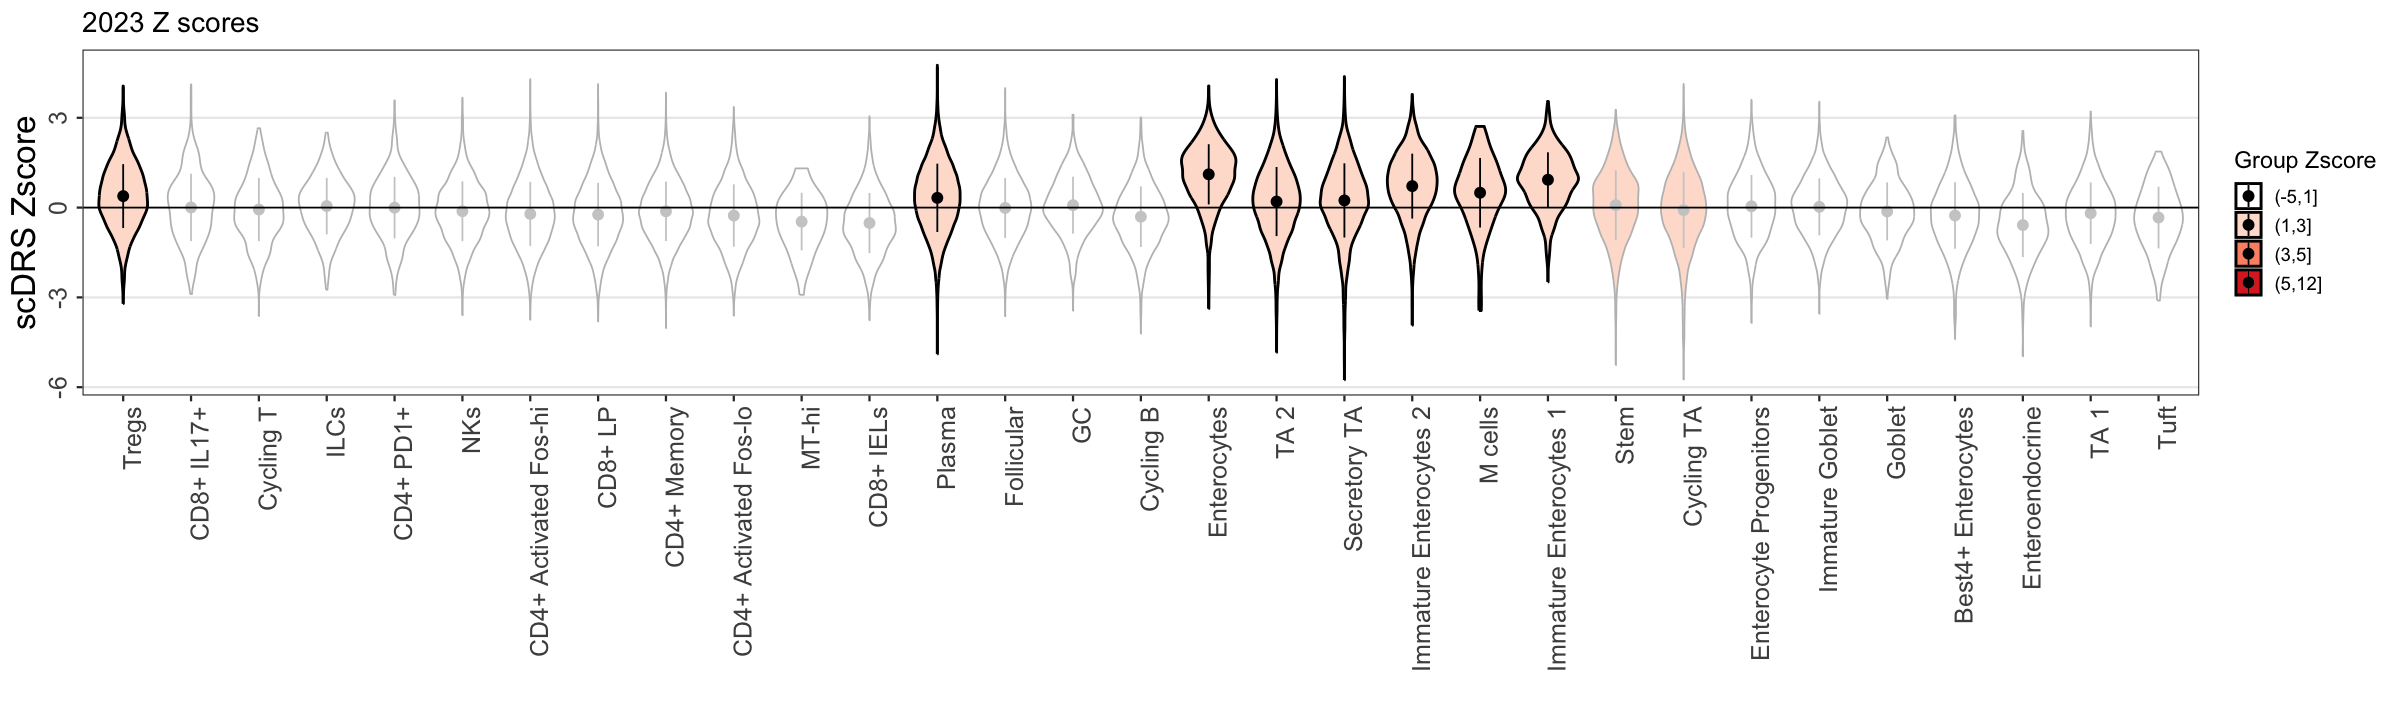

In [39]:

data2 = meta_data_tepi[meta_data_tepi$cluster %in% sig_cell_clusters,]
options(repr.plot.height = 6, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(meta_data_tepi, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore, fill=cut(Z_score_micro, breaks = c(-5, 1, 3, 5, 12)))) +
geom_violin(data=meta_data_tepi, color="grey", linewidth=0.5) +  
geom_violin(data=data2, color="black", linewidth=0.8, aes(fill=cut(Z_score_micro, breaks = c(-5, 1, 3, 5, 12)))) + 
stat_summary(fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_text(angle=90, size=15, hjust=1), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
 ggtitle("2023 Z scores") + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_fill_manual(values = c('white', '#fee0d2', "#fc9272", '#de2d26'),
                   limits = c('(-5,1]', '(1,3]', '(3,5]', '(5,12]'))  + labs(y="scDRS Zscore",x='',fill="Group Zscore")
ggsave("./scDRS_UC_TBE_Zscores.pdf", height=6, width=20)

#### Colored with discrete sections for easier visualization (Using UC based Z score sections)

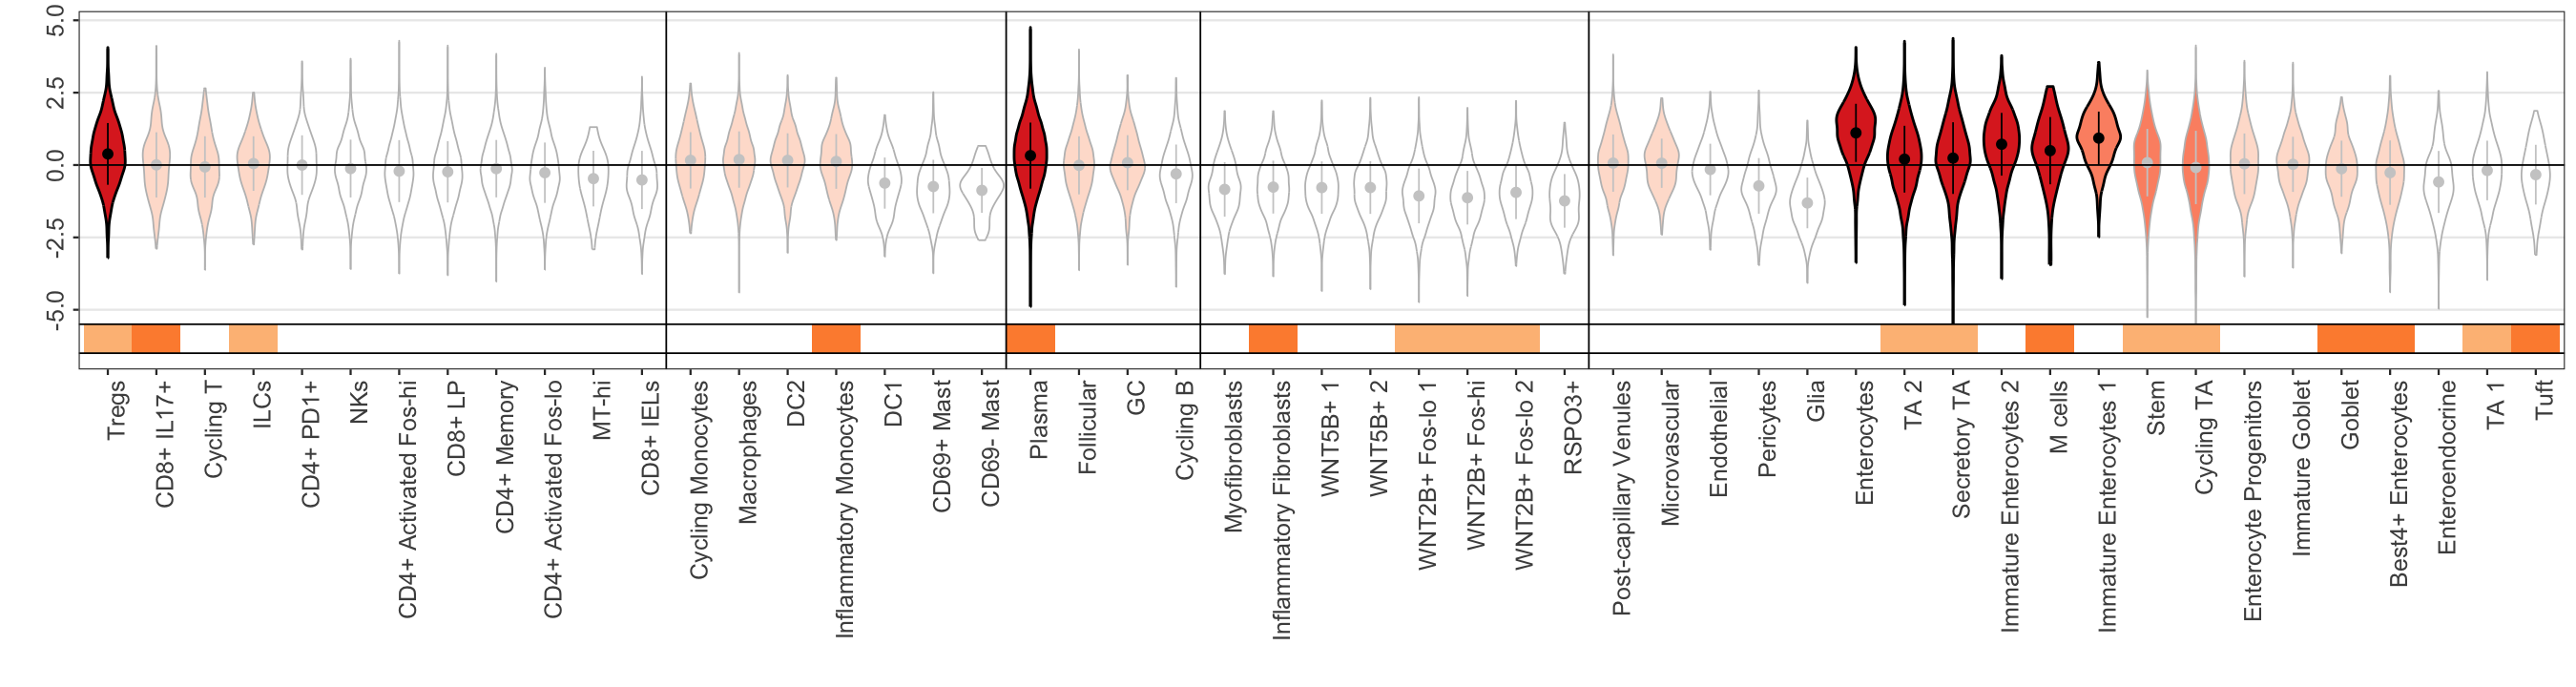

In [81]:
data2 = meta_data[meta_data$cluster %in% sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster %in% sig_cell_clusters,]
options(repr.plot.height = 6, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
ggplot(meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore, fill=cut(Z_score_micro, breaks = c(-3, 0, 1, 2, 4)))) +
geom_violin(data=data1, color="grey", linewidth=0.5) +  
geom_violin(data=data2, color="black", linewidth=0.8, aes(fill=cut(Z_score_micro, breaks = c(-3, 0, 1, 2, 4)))) + 
stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
scale_fill_manual(values = c('white', '#fee0d2', "#fc9272", '#de2d26'),
                   limits = c('(-3,0]', '(0,1]', '(1,2]', '(2,4]')) +

new_scale("fill") +

geom_tile(aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=-6 , fill=factor(cluster, levels=rev(ranked_cell_clusters)))) +
scale_fill_manual(values=exp_colors) + theme_bw(base_size=14) + 

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 

geom_hline(yintercept=-5.5, color="black") + geom_hline(yintercept=-6.5, color="black") + 
geom_vline(xintercept=12.5, color="black") + geom_vline(xintercept=19.5, color="black") + geom_vline(xintercept=23.5, color="black") + 
geom_vline(xintercept=31.5, color="black") + 
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_text(angle=90, size=15, hjust=1), legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="") 

ggsave("./scDRS_UC_Label_full.pdf", height=6, width=22.5)

## 3. scGWAS

In [63]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/UC/"
# #scgwas_macro <- fread(paste0(scgwas_dir, "UC_signif_celltypes.sig_module.txt"))
scgwas_micro <- fread(paste0(scgwas_dir, "UC_signif_clusters.sig_module.txt"))

In [64]:
scgwas_micro_count <- data.frame(table(scgwas_micro$cell_type))
scgwas_micro_count <- scgwas_micro_count[order(-scgwas_micro_count$Freq),]
freq_dict = list()
rank = 1
# create a dictionary based on the numbers provided:
for (freq in unique(scgwas_micro_count$Freq)) {
    freq_dict[freq] = rank
    rank = rank + 1
    }
rank_freq_list = c()
# then change the rank_freq
for (freq in scgwas_micro_count$Freq) {
    rank_freq_list <- c(rank_freq_list, freq_dict[freq])
    }
scgwas_micro_count$rank_freq <- rank_freq_list

scgwas_micro_count$rank_freq <- as.character(scgwas_micro_count$rank_freq)
unique(scgwas_micro_count$rank_freq)


[1] "1"

In [65]:
# add the groups that have 0 counts to the thing
# add the groups that have 0 counts to the thing

scgwas_0_list <- c(setdiff(names(meta_colors), scgwas_micro_count$Var1))
Var1 <- as.vector(scgwas_micro_count$Var1)
new_Var1 <- c(Var1, scgwas_0_list)
new_Freq <- c(scgwas_micro_count$Freq, rep(0, length(scgwas_0_list)))
new_rank_freq <- c(scgwas_micro_count$rank_freq, rep(" ", length(scgwas_0_list)))
scgwas_micro_count <- data.frame(group = new_Var1, 
                            Freq = new_Freq, 
                            rank_freq = new_rank_freq)
scgwas_micro_count[1:4,]

,group,Freq,rank_freq
,<chr>,<dbl>,<chr>
1,Enteroendocrine,1,1
2,M cells,1,1
3,Immature Goblet,0,
4,Goblet,0,


In [66]:
setdiff(rownames(meta_count), micro_table$group)
setdiff(micro_table$group, rownames(meta_count))

character(0)

character(0)

In [67]:
meta_count <- meta_count[micro_table$group,]
identical(as.factor(meta_count$Group), as.factor(micro_table$group))
micro_table <- cbind(micro_table, meta_count[,c("Sig_Count", "Sig_prop")])
meta_count[1:2,]
micro_table[1:2,]

[1] TRUE

,Group,Count,Sig_Count,Sig_prop
,<fct>,<int>,<dbl>,<dbl>
RSPO3+,RSPO3+,347,0,0.0000000
Plasma,Plasma,62992,7623,0.1210154


group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,prop_sig,rank_prop_sig,rank_assoc_mcz,Sig_Count,Sig_prop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
RSPO3+,347,1000,0.99900100,-2.72375,0.796203800,-0.8620024,0,0,0,0,40,1,0,0.0000000
Plasma,62992,1000,0.00999001,2.69578,0.006993007,3.8590572,0,0,0,0,38,2,7623,0.1210154


In [68]:
# add cell type to scgwas_micro
scgwas_micro_graph <- scgwas_micro[,c("cell_type", "module_score_z")]
scgwas_micro_graph$cell_type <- str_split_fixed(scgwas_micro_graph$cell_type, 
                                                ":",2)[,1]
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(ranked_cell_clusters, scgwas_micro$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(ranked_cell_clusters, scgwas_micro$cell_type)))))
scgwas_micro_graph[1:3,]
scgwas_micro_graph <- rbind(scgwas_micro_graph, add_df)              

# add cell type name and z_score
cell_type_dict <- meta_data$macro
names(cell_type_dict) <- meta_data$cluster
cell_types <- c()
Z_scores <- c()
for (cluster in scgwas_micro_graph$cell_type) {
    cell_types <- c(cell_types, cell_type_dict[cluster])
    Z_scores <- c(Z_scores, micro_table[micro_table$group == cluster,]$assoc_mcz)
    }
scgwas_micro_graph$macro <- cell_types
scgwas_micro_graph$Z_score <- Z_scores
scgwas_micro_graph[1:3,]
dim(scgwas_micro_graph)

cell_type,module_score_z
<chr>,<dbl>
Enteroendocrine,2.832472
M cells,2.726836
NA,NA


cell_type,module_score_z,macro,Z_score
<chr>,<dbl>,<chr>,<dbl>
Enteroendocrine,2.832472,Epithelial,-0.3808372
M cells,2.726836,Epithelial,2.1824055
Tuft,0.000000,Epithelial,-0.6353934


[1] 51  4

Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”


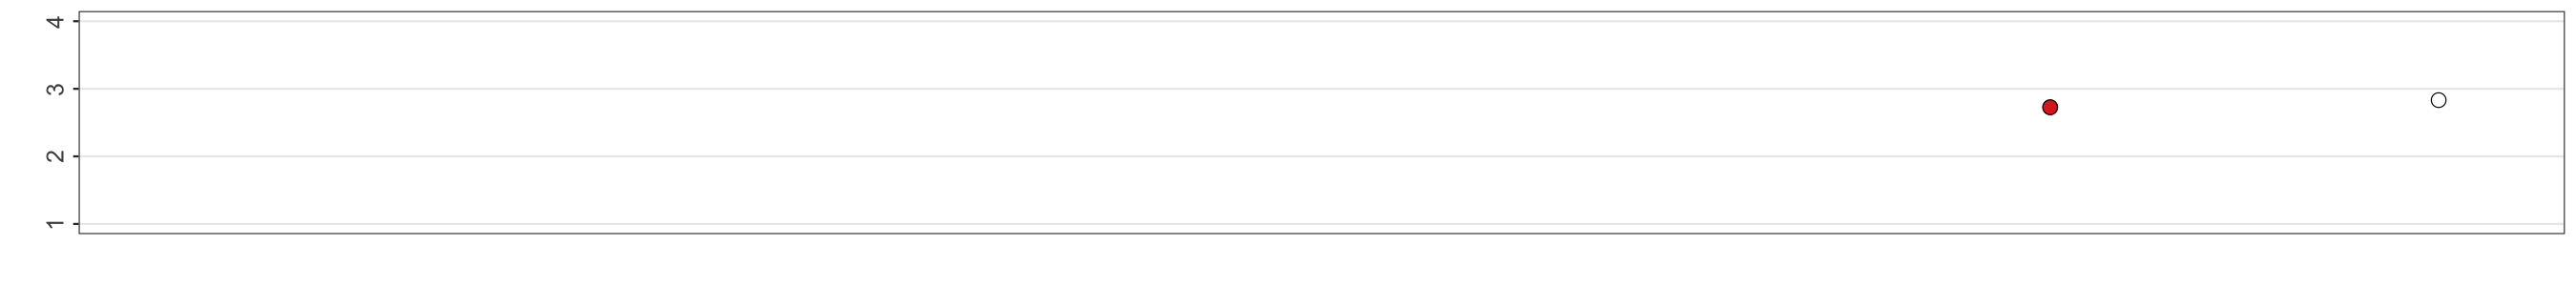

In [78]:
use <- scgwas_micro_graph

options(repr.plot.height =2.5 , repr.plot.width =22.5 )#[meta_data$pval < 0.1,]
ggplot(scgwas_micro_graph, aes(x=factor(cell_type, levels=rev(ranked_cell_clusters)), y=module_score_z, color=cut(Z_score, breaks = c(-3, 0, 1, 2, 4))))+ #fill=cell_type)) +
geom_point(size=4) +  geom_point(shape = 1,size = 4,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(legend.position="None", 
     axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
#facet_wrap(vars(macro),nrow=1,scales="free") + ggtitle("2023 Z scores") + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_color_manual(values = c('white', '#fee0d2', "#fc9272", '#de2d26'),
                   limits = c('(-3,0]', '(0,1]', '(1,2]', '(2,4]')) + labs(y="",x='') + ylim(1, 4)
ggsave("./scGWAS_UC_TBE_Zscores.pdf", height=2.5, width=22.5)